<a href="https://colab.research.google.com/github/ps444280/Movie-Rating-Prediction/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
!git clone https://github.com/ps444280/Movie-Rating-Prediction.git


Cloning into 'Movie-Rating-Prediction'...


In [115]:
df=pd.read_csv('/content/IMDb Movies India.csv',lineterminator='\n',encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3\r
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia\r
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid\r
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana\r
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor\r
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali\r


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
  15509 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [117]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [118]:
df.duplicated().sum()

np.int64(6)

In [119]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [120]:
#checking the data for null or missing values
df.isnull().sum()
#Dropping Missing Values
df.dropna(inplace=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3\r
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid\r
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor\r
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor\r
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma\r
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia\r


# **We Split Genre into a list and then explode our dataframe to have only one genre per row for each movie**

In [121]:
df['Genre']=df['Genre'].str.split(',')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3\r
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid\r
1,#Yaaram,(2019),110 min,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor\r
2,#Yaaram,(2019),110 min,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor\r
3,...Aur Pyaar Ho Gaya,(1997),147 min,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor\r
4,...Aur Pyaar Ho Gaya,(1997),147 min,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor\r


In [122]:
#Casting column into category
df['Genre']=df['Genre'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12040 entries, 0 to 12039
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      12040 non-null  object  
 1   Year      12040 non-null  object  
 2   Duration  12040 non-null  object  
 3   Genre     12040 non-null  category
 4   Rating    12040 non-null  float64 
 5   Votes     12040 non-null  object  
 6   Director  12040 non-null  object  
 7   Actor 1   12040 non-null  object  
 8   Actor 2   12040 non-null  object  
  12040 non-null  object  
dtypes: category(1), float64(1), object(8)
memory usage: 859.8+ KB


In [123]:
df.nunique()

,0
Name,5430
Year,91
Duration,175
Genre,40
Rating,83
Votes,2028
Director,2459
Actor 1,1995
Actor 2,2358
Actor 3\r,2557


# **Converting Votes DType from Object to float**

In [124]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12040 entries, 0 to 12039
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      12040 non-null  object  
 1   Year      12040 non-null  object  
 2   Duration  12040 non-null  object  
 3   Genre     12040 non-null  category
 4   Rating    12040 non-null  float64 
 5   Votes     12040 non-null  float64 
 6   Director  12040 non-null  object  
 7   Actor 1   12040 non-null  object  
 8   Actor 2   12040 non-null  object  
  12040 non-null  object  
dtypes: category(1), float64(2), object(7)
memory usage: 859.8+ KB


## **Calculating Director Sucess Rate**

In [125]:
# Calculate the average rating for each director
director_avg_rating = df.groupby('Director')['Rating'].mean()

# Map the director's success rate to each movie
df['Director_Success_Rate'] = df['Director'].map(director_avg_rating)

# Calculate the average director success rate for each genre
genre_director_avg = df.groupby('Genre')['Director_Success_Rate'].mean()

# Map this value to each movie
df['Similar_Movie_Director_Success_Rate'] = df['Genre'].map(genre_director_avg)
df


<ipython-input-125-c6a5e43c9b2e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_director_avg = df.groupby('Genre')['Director_Success_Rate'].mean()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3\r,Director_Success_Rate,Similar_Movie_Director_Success_Rate
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid\r,7.000000,6.216816
1,#Yaaram,(2019),110 min,Comedy,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor\r,4.400000,5.849649
2,#Yaaram,(2019),110 min,Romance,4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor\r,4.400000,5.892653
3,...Aur Pyaar Ho Gaya,(1997),147 min,Comedy,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor\r,5.335135,5.849649
4,...Aur Pyaar Ho Gaya,(1997),147 min,Drama,4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor\r,5.335135,5.840742
...,...,...,...,...,...,...,...,...,...,...,...,...
12035,Zulm Ki Zanjeer,(1989),125 min,Drama,5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth\r,6.290476,5.840742
12036,Zulmi,(1999),129 min,Action,4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani\r,5.175000,5.571914
12037,Zulmi,(1999),129 min,Drama,4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani\r,5.175000,5.840742
12038,Zulm-O-Sitam,(1998),130 min,Action,6.2,20.0,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja\r,4.090625,5.571914


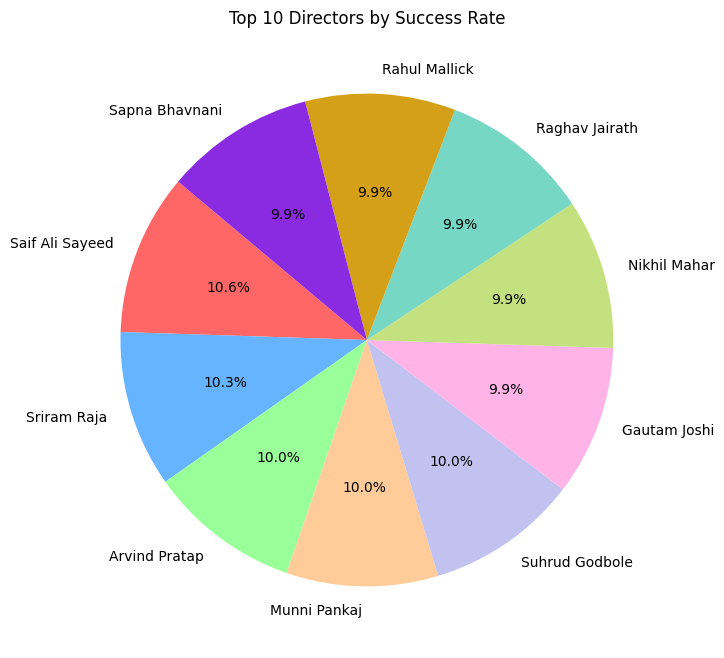

In [126]:
import matplotlib.pyplot as plt

# Get the top 10 directors by success rate
top_directors = df.groupby('Director')['Director_Success_Rate'].mean().nlargest(10)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140, colors=['#ff6666', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0',
          '#ffb3e6', '#c4e17f', '#76D7C4', '#D4A017', '#8A2BE2'])

# Add a title
plt.title('Top 10 Directors by Success Rate')

# Show the pie chart
plt.show()


In [127]:
#Average Rating
df['Votes'] = df['Votes'].astype(float)  # Convert votes to numeric
weighted_avg_rating = (df['Rating'] * df['Votes']).sum() / df['Votes'].sum()
print("Weighted Average Rating:", weighted_avg_rating)


Weighted Average Rating: 6.866455903426856


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12040 entries, 0 to 12039
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Name                                 12040 non-null  object  
 1   Year                                 12040 non-null  object  
 2   Duration                             12040 non-null  object  
 3   Genre                                12040 non-null  category
 4   Rating                               12040 non-null  float64 
 5   Votes                                12040 non-null  float64 
 6   Director                             12040 non-null  object  
 7   Actor 1                              12040 non-null  object  
 8   Actor 2                              12040 non-null  object  
                             12040 non-null  object  
 10  Director_Success_Rate                12040 non-null  float64 
 11  Similar_Movie_Director_Succe

In [129]:
df['Similar_Movie_Director_Success_Rate'] = df['Similar_Movie_Director_Success_Rate'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12040 entries, 0 to 12039
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Name                                 12040 non-null  object  
 1   Year                                 12040 non-null  object  
 2   Duration                             12040 non-null  object  
 3   Genre                                12040 non-null  category
 4   Rating                               12040 non-null  float64 
 5   Votes                                12040 non-null  float64 
 6   Director                             12040 non-null  object  
 7   Actor 1                              12040 non-null  object  
 8   Actor 2                              12040 non-null  object  
                             12040 non-null  object  
 10  Director_Success_Rate                12040 non-null  float64 
 11  Similar_Movie_Director_Succe

In [132]:
# Calculate the average rating for each genre
genre_avg_rating = df.groupby('Genre')['Rating'].mean()

# Map the average genre rating to each movie
df['Similar_Movie_Avg_Rating'] = df['Genre'].map(genre_avg_rating)

# Define features (X) and target variable (y)
X = df[['Genre', 'Director_Success_Rate', 'Similar_Movie_Avg_Rating', 'Votes']]
y = df['Rating']

<ipython-input-132-0bcf9b0f4961>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_avg_rating = df.groupby('Genre')['Rating'].mean()


In [136]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# ... (your existing code for data loading and cleaning) ...

# Handle the 'Genre' column containing non-numeric values
# Using Label Encoding
le = LabelEncoder()
df['Genre_Encoded'] = le.fit_transform(df['Genre'])

# Define features (X) and target variable (y)
X = df[['Genre_Encoded', 'Director_Success_Rate', 'Similar_Movie_Avg_Rating', 'Votes']]
y = df['Rating']

# Split data into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

RMSE: 0.6544428250674108*100
R² Score: 0.7705781967827711
